# 3D maps of topography

In [ ]:
#pip install rasterio pyvista numpy matplotlib
#pip install trame


In [15]:
import rasterio
import numpy as np
import pyvista as pv
import os

%matplotlib inline

In [5]:
# set the directory 
os.chdir('/Users/lfloerl/Desktop/MICROTERROIR/Data/Topography')

/Users/lfloerl/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/lfloerl/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


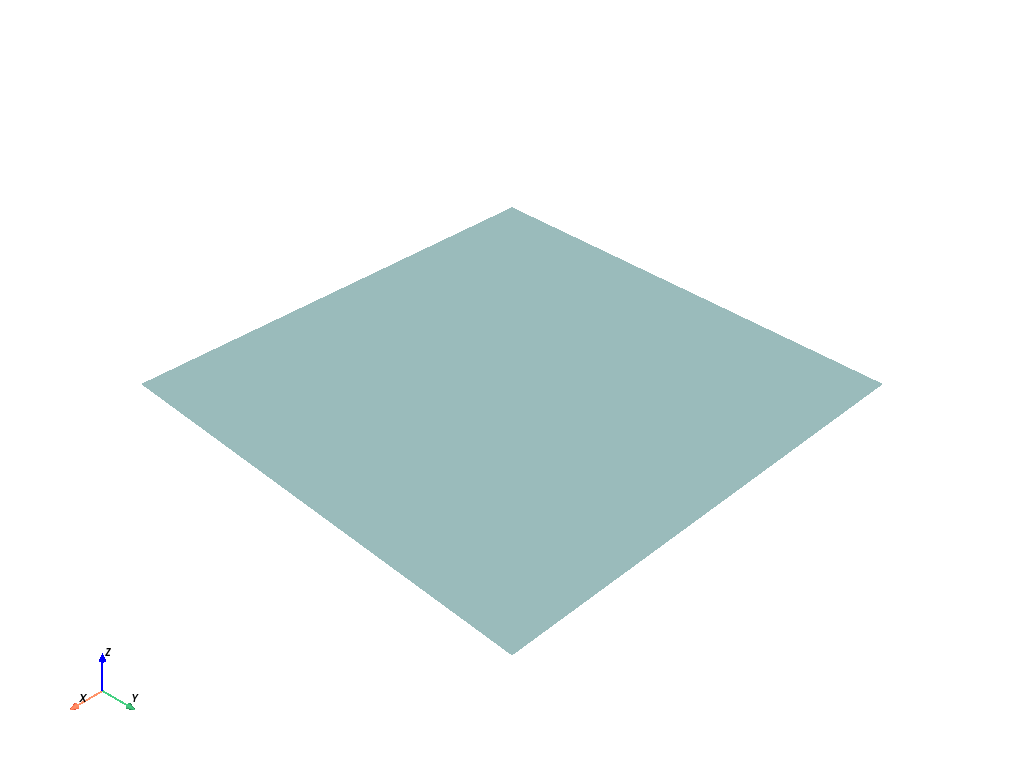

: 

In [ ]:
# Load the DEM GeoTIFF
with rasterio.open("swissalti3d_2019_2503-1126_0.5_2056_5728.tif") as src:
    elevation = src.read(1)  # Read the elevation data (first band)
    transform = src.transform  # Get the affine transformation matrix

# Create X, Y coordinate arrays
height, width = elevation.shape
x = np.arange(width) * transform.a + transform.c  # Apply affine transform to get the x coordinates
y = np.arange(height) * transform.e + transform.f  # Apply affine transform to get the y coordinates
x, y = np.meshgrid(x, y)

# Flatten arrays and create points
points = np.column_stack((x.ravel(), y.ravel(), elevation.ravel()))

# Create a PyVista structured grid from the elevation data
grid = pv.StructuredGrid(x, y, elevation)

# Set up a PyVista plotter
plotter = pv.Plotter()
plotter.add_mesh(grid, cmap='terrain')  # Apply the terrain colormap
plotter.add_axes()  # Optionally add axes for reference
plotter.show()  # Show the plot
